# Assignment 1.1: Exploring WS and BA models

**Exercises: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.**

- *What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?*

It's missing the cluster effect


- *List the four regimes that characterize random networks as a function of  ⟨k⟩*

**Subcritical regime: 0 < ⟨k⟩ < 1**
So few links in the network, so only very small clusters. So the largest cluster is the giant component, but the largest cluster is a tree of size N_G ~ lnN, but the relative size of this converts to zero since: N_G/N ≃ lnN/N→0 in the N→∞ limit

**Critical point: ⟨k⟩ = 1**
Still no giant component, since the relative size of the largest component is still zero. 
The size of the largest component is N_G ~ N^(2/3), so the relative size is: N_G/N ~ N^(2/3)/N = N^(-1/3) which converts to 0 for N → ∞.

**Supercritical regime: ⟨k⟩ > 1**
The giant component now looks like a network with loops and cycles.
The relative size of the giant component is 
NG/N ∼ ⟨k⟩ − 1 (close to the supercritical point)
or
NG ∼ (p-p_c)N  (p_c = 1/(N−1) ≈ 1/N
The giant component contains a finite fraction of the nodes. The further we move from the critical point, a larger fraction of nodes will belong to it.
The supercritical regime lasts until all nodes are absorbed by the giant component.

**Connected regime: ⟨k⟩ > ln(N)**

Svar færdigt her: Frida



- *According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k)  decreases as a function of  k  in real-world networks?*

Svar her: Frida


**Exercises: WS edition.**

- *First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  p=0,0.1,  and  1 . Calculate the average shortest path length  ⟨d⟩  for each one.*


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

graphs = [G1, G2, G3]

for i, G in enumerate(graphs, 1):
    print(f"G{i}: Average shortest path length = {nx.average_shortest_path_length(G)}")

G1: Average shortest path length = 62.875751503006015
G2: Average shortest path length = 7.980248496993988
G3: Average shortest path length = 4.7922164328657315


- *Describe what happens to the network when  p=1.*

Svar her: Karen

- *Generate a lot of networks with different values of  p . You will notice that paths are short when  p  is close to one and they are long when p=0 . What's the value of  p  for which the average shortest path length gets close to the short paths we find in a fully randomized network.*


In [2]:
# Generer mange grafer og se på histogram hvad den average shortest path length er: Karen

- *Let's investigate this behavior in detail. Generate 50 networks with  N=500 ,  ⟨k⟩=4 , for each of  p={0,0.01,0.03,0.05,0.1,0.2} . Calculate the average of  ⟨d⟩  as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.*

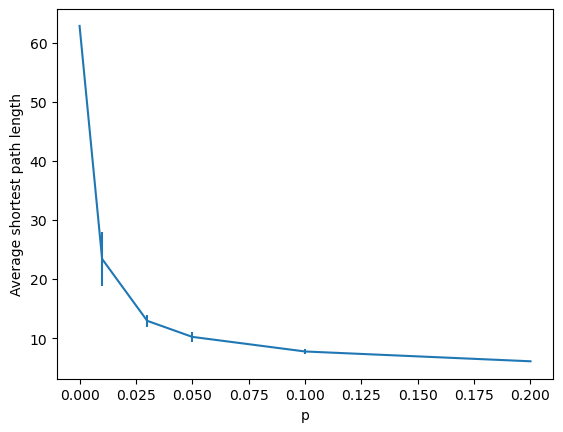

In [3]:
N = 500
k = 4
p = 0.01

p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
means =[]
stds = []

for p in p_values:
    lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(N, k, p)
        l = nx.average_shortest_path_length(G)
        lengths.append(l)

    p_avg = np.mean(lengths)
    p_std = np.std(lengths)

    means.append(p_avg)
    stds.append(p_std)

plt.errorbar(p_values, means, stds)
plt.xlabel("p")
plt.ylabel("Average shortest path length")
plt.show()

- *Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.*

Skriv her: Karen

**Exercises: BA edition.**

- *What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).*

Svar her: Karen

- *What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.*

Svar her: Karen

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

- *First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).*

- *Now add another node, connecting one of the existing nodes in proportion to their degree.*

- *Keep going until you have a 100 node network.*

- *Plot the network.*

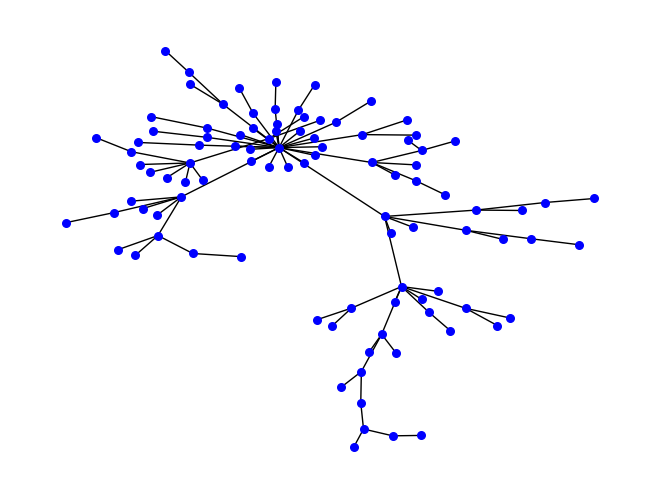

In [5]:
import random

G = nx.Graph()
G.add_nodes_from([1, 2])
G.add_edge(1, 2)

edge_list = list(G.edges)

# Node list where nodes occur the amount of times as their degree
node_list = [node for edge in edge_list for node in edge]


for i in range(3,101):
    G.add_node(i)
    rnd_node = random.choice(node_list) 
    G.add_edge(i, rnd_node)
    node_list.extend([i, rnd_node])

nx.draw(G, with_labels=False, node_color="blue", node_size=30)
plt.show()

- *Add more nodes until you have a 5000 node network.*

- *What's the maximum and minimum degree?*

In [7]:
for i in range(101,5000):
    G.add_node(i)
    rnd_node = random.choice(node_list) 
    G.add_edge(i, rnd_node)
    node_list.extend([i, rnd_node])

degrees = [d for n, d in G.degree()]
max_deg = max(degrees)
min_deg = min(degrees)

print("Max degree:", max_deg, "\nMin degree:", min_deg)

Max degree: 325 
Min degree: 1


- *Now, bin the degree distribution using numpy.histogram.*

- *Plot the distribution. Plot it with both linear and log-log axes.*

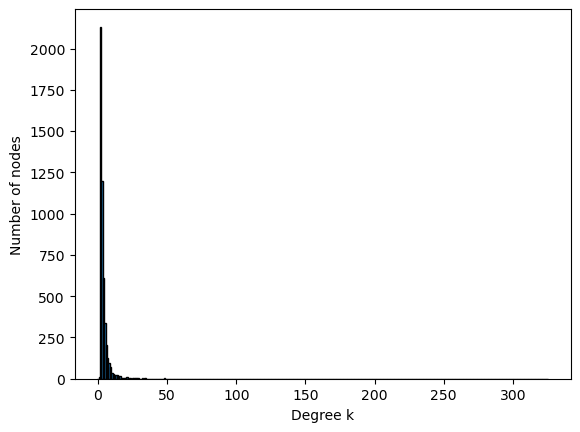

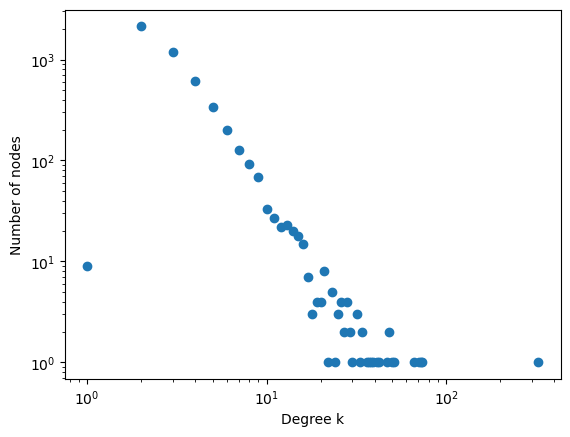

In [8]:
counts, bin_edges = np.histogram(degrees, bins=range(max(degrees)+2))  
plt.bar(bin_edges[:-1], counts, width=1.0, edgecolor='black')
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.show()

plt.loglog(bin_edges[:-1], counts, marker='o', linestyle='None')
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

	
**Excercise: Explain your process in words**

- *First, simply describe the steps of the process (what you did, step by step)*

We started by simply copying the wiki-site into at txt file called wiki.txt.
From this we could use RegEx to find all Rock Musicians on the page and create a list of their names/titles.

We could then loop through all the names in the list, and use the urllib to load the wiki-page corresponding to each of the artists and safe the data in a .txt file in a folder.
In this part we had some trouble, since we were forbidden acces to the wiki API, but we then added a header to our request, giving permission.

Next up we created a DiGraph using NetworkX.

We then looped through the files in the folder, and for each file we added the name of it as a node in the graph. We counted the number of words in the file and added that number as an "attribute" to the node.
We then used RegEx to look through the file to match which wiki-pages in linked too. If the page it linked to was in out list of artists, then the link would be added as an edge.

We then removed the isolated nodes (there were 4), and extracted the largest component. Which was the same graph as when removing the isolated nodes in this coincidence.

- *Then, write a short section about which part of the process that was most difficult*

The Regular Expression were a bit challenging, since we were not that used to thinking in that way - and it takes some getting used to. We also, by mistake, matched more words than we wanted to, and had to manually remove one name from the list (AllMusic).

Other than that it was also challenging to figure out how to download all the wiki-pages. We are still not that used to using API's and hadn't tried it other than in week 1. But it was good to get a refresh. Also figuring out how to skip the redirected pages.


- *Next write a short section about how you used LLMs to help you*

We used LLM primarly with making the RegEx - and understanding how to "build" them.
Besides that we also had help making the download loop, especially figuring out how the make a header such that we were not forbidden access, and also how to skip the redirected links.

- *Finally, compose a short section about what you would do differently if you had to do it again*

Everything turned in to a bit of a mess, so structuring the different code files would be nice to do from the beginning.

We would also run smaller sets in the beginning, until we knew that our script worked. Here we let it download all the pages before being sure that it worked, which wasn't that smart.


**Exercise: Simple network statistics and analysis**

In [16]:
# Fetching the network from GitHub file

import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/fridapfrandsen/network-data/main/mit_netværk.gexf"

response = requests.get(url)
response.raise_for_status()

G = nx.read_gexf(BytesIO(response.content))

- *What is the number of nodes in the network?*

- *More importantly, what is the number of links?*

In [17]:
print(f"Number of nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}")

Number of nodes: 484, edges: 7283


- *Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?*

  - *Compare the out-degree distribution to a random network with the same number of nodes and links.*

  - *Compare the in-degree distribution to a scale-free network with the same number of nodes.*

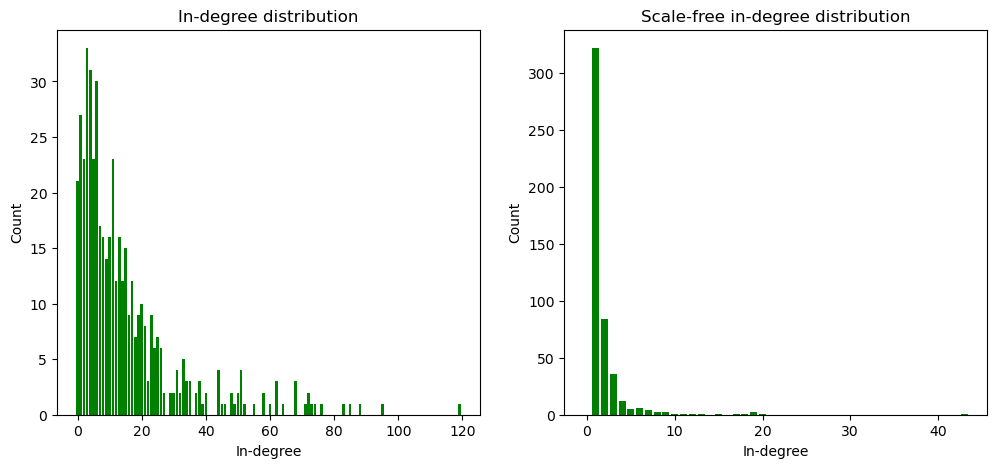

In [20]:
# Getting the size of G
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# In degrees for G
in_degrees = [G.in_degree(n) for n in G.nodes()]

# Creating the scale-free network
G_sf = nx.barabasi_albert_graph(num_nodes, 1)  
sf_in_degrees = [G_sf.degree(n) for n in G_sf.nodes()]

# Making histogram for G and the scale-free network
in_hist, in_bins = np.histogram(in_degrees, bins=range(max(in_degrees)+2))
sf_in_hist, sf_in_bins = np.histogram(sf_in_degrees, bins=range(max(sf_in_degrees)+2))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar(in_bins[:-1], in_hist, color='g')
axes[0].set_title("In-degree distribution")
axes[0].set_xlabel("In-degree")
axes[0].set_ylabel("Count")

axes[1].bar(sf_in_bins[:-1], sf_in_hist, color='g')
axes[1].set_title("Scale-free in-degree distribution")
axes[1].set_xlabel("In-degree")
axes[1].set_ylabel("Count")

plt.show()

Text(0, 0.5, 'Count')

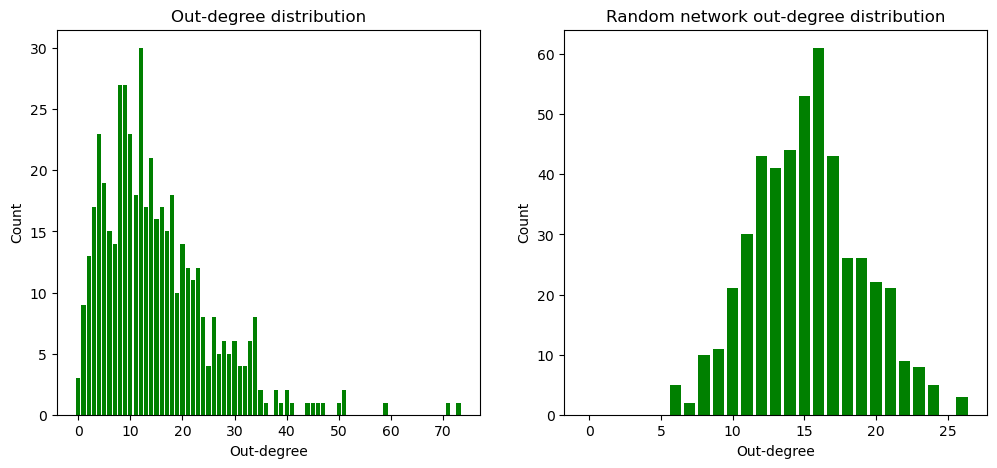

In [21]:
# The out degrees for G
out_degrees = [G.out_degree(n) for n in G.nodes()]

# Making a random network with same amount of nodes and edges
p = num_edges / (num_nodes * (num_nodes - 1))
G_random = nx.gnp_random_graph(num_nodes, p, directed=True)
rnd_out_degrees = [G_random.out_degree(n) for n in G_random.nodes()]

# Making histograms for G and the random network
out_hist, out_bins = np.histogram(out_degrees, bins=range(max(out_degrees)+2))
rnd_out_hist, rnd_out_bins = np.histogram(rnd_out_degrees, bins=range(max(rnd_out_degrees)+2))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar(out_bins[:-1], out_hist, color='g')
axes[0].set_title("Out-degree distribution")
axes[0].set_xlabel("Out-degree")
axes[0].set_ylabel("Count")

axes[1].bar(rnd_out_bins[:-1], rnd_out_hist, color='g')
axes[1].set_title("Random network out-degree distribution")
axes[1].set_xlabel("Out-degree")
axes[1].set_ylabel("Count")

Forklar forskellen mellem in og out degree og skriv hvad vi observerer: Frida

- *Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?*

In [23]:
# Getting the dictionary of the in and out degrees:
in_degrees = dict(G.in_degree())   
out_degrees = dict(G.out_degree()) 

# Sorting the list and getting top 5
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 by in-degree:", top_in)
print("Top 5 by out-degree:", top_out)

Top 5 by in-degree: [('Led_Zeppelin', 119), ('Bob_Dylan', 95), ('Queen_(band)', 88), ('Metallica', 85), ('David_Bowie', 83)]
Top 5 by out-degree: [('Alice_in_Chains', 73), ('Deep_Purple', 71), ('Black_Sabbath', 59), ('Def_Leppard', 51), ('Bryan_Adams', 51)]


It makes sence that the artists with the most in-degrees are very popular artists/bands, and has therefore been linked by many others.

It's a bit more difficult to see if the top 5 of the out-degrees makes sence. It could be that these are bands that have been very active with working with other bands and therefore links to many others.

- *What are the 10 pages with the longest wiki entries?*

In [24]:
content_lengths = {
    node: (data.get("len_of_content")) 
    for node, data in G.nodes(data=True)
}

top10 = sorted(content_lengths.items(), key = lambda x: x[1], reverse=True)[:10]

print("The 10 pages with the most content:")

for node, count in top10:
    print(node, ":", count)

The 10 pages with the most content:
Guns_N'_Roses : 60850
Coldplay : 47026
Queen_(band) : 46175
Marilyn_Manson_(band) : 46032
The_Rolling_Stones : 44022
U2 : 43048
Bob_Dylan : 42510
David_Bowie : 42415
Paul_McCartney : 42407
Elton_John : 41255


**Exercise: Let's build a simple visualization of the network**

- *For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).*

- *Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithms here.)*
  - *Set up your plot so that node-size depends on the node degree.*
  - *Make the node color depend on the length of content attribute.*

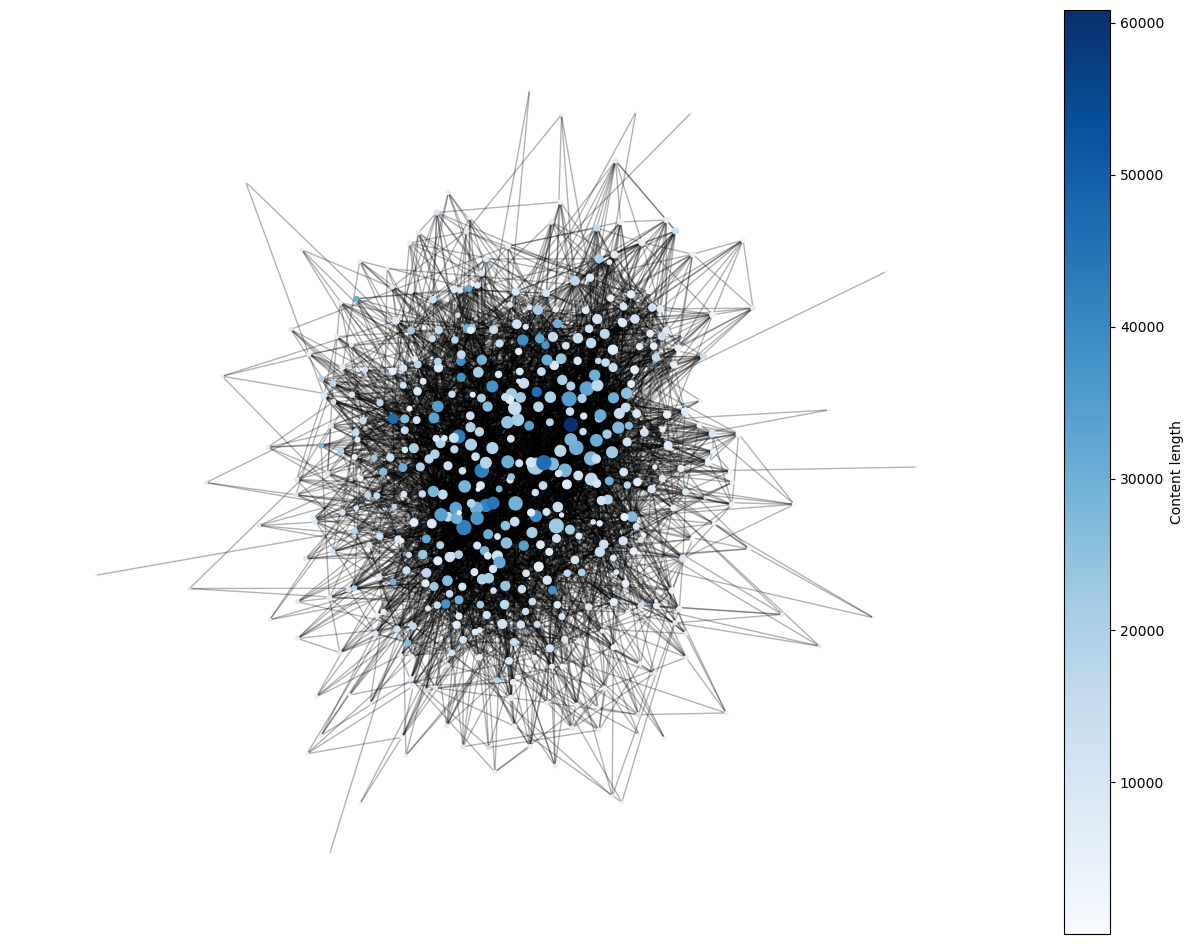

In [25]:
G_undirected = G.to_undirected()

# Find node size
degrees = dict(G_undirected.degree())
node_sizes = [deg for deg in degrees.values()] 

# Node colors
content_lengths = nx.get_node_attributes(G_undirected, "len_of_content")
node_colors = [content_lengths.get(n, 0) for n in G_undirected.nodes()]

# Drawing the network
plt.figure(figsize=(16,12))
pos = nx.spring_layout(G_undirected, seed=40)

nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label="Content length")
plt.axis("off")
plt.show()